<a href="https://colab.research.google.com/github/eughappy/HomeWork/blob/claster_hw/9hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 завдання

In [1]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import patoolib
import os
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
patoolib.extract_archive('data.zip')

INFO patool: Extracting data.zip ...
INFO:patool:Extracting data.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_dxcjlz6m -- data.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_dxcjlz6m -- data.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... data.zip extracted to `data'.
INFO:patool:... data.zip extracted to `data'.


'data'

In [4]:
mnist_df = pd.read_csv('/content/data/mnist.csv')
twodim_df = pd.read_csv('/content/data/data_2d.csv')

In [5]:
print(twodim_df.shape,mnist_df.shape)

(199, 3) (499, 785)


In [6]:
scaler = StandardScaler()
twodim_df = scaler.fit_transform(twodim_df)
#twodim_df = np.delete(twodim_df,0,1)
mnist_df = scaler.fit_transform(mnist_df)

Робимо дослідження за методом ліктя:

k 2 sil 0.5661110323530602
k 3 sil 0.4624506094958304
k 4 sil 0.3668669724207479
k 5 sil 0.37456706564098297
k 6 sil 0.3753228018207527
k 7 sil 0.33831230337759344
k 8 sil 0.34098384402031723
k 9 sil 0.3249691959048971
k 10 sil 0.35816393309592076
k 11 sil 0.345356935193698
k 12 sil 0.36335216355974825
k 13 sil 0.34070628161833205
k 14 sil 0.3525538191484066
k 15 sil 0.3509498213476473
k 16 sil 0.32691655369925815
k 17 sil 0.3538733348932729
k 18 sil 0.34516541178664756
k 19 sil 0.3615364759378516


Text(0.5, 1.0, 'Elbow curve')

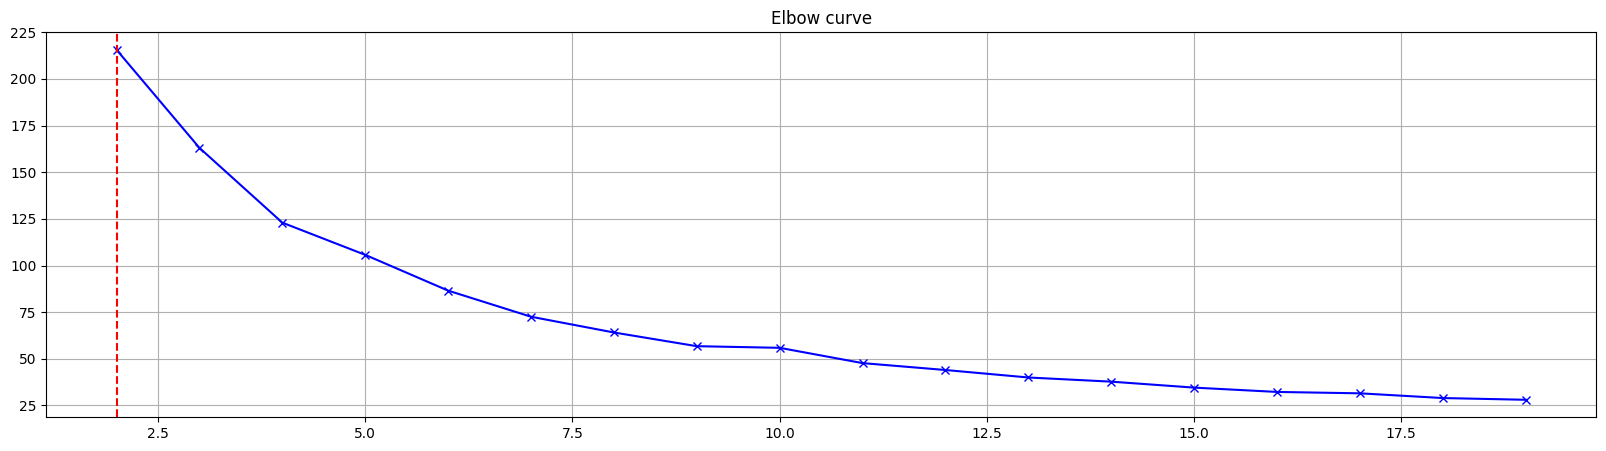

In [32]:
distorsions = []
score = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(twodim_df)
    distorsions.append(kmeans.inertia_)
    temp_score = silhouette_score(twodim_df,kmeans.fit_predict(twodim_df))
    score.append(temp_score)
    print('k',k,'sil',temp_score)

optimal_k = score.index(sorted(score)[-1])+2
fig = plt.figure(figsize=(20, 5))
plt.plot(range(2, 20), distorsions,'bx-')
plt.grid(True)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow curve')

In [35]:
kmeans = KMeans(n_clusters=2,n_init='auto').fit(twodim_df)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Робимо метод ліктя дл mnist датасету:

k 2 sil 0.154455189432453
k 3 sil 0.04738873526455686
k 4 sil 0.04307319824821351
k 5 sil 0.051816688409000396
k 6 sil 0.041496663026190476
k 7 sil 0.031675509741241115
k 8 sil 0.04750911244260959
k 9 sil 0.027386853589272717
k 10 sil 0.03187024900175564
k 11 sil 0.04841651927733659
k 12 sil 0.043316886269602194
k 13 sil 0.00837743680717122
k 14 sil 0.025312147511518925
k 15 sil 0.04519398870049606
k 16 sil 0.048932973880324554
k 17 sil 0.004793075128332919
k 18 sil 0.04901999425729216
k 19 sil -0.0006328440930991826


Text(0.5, 1.0, 'Elbow curve')

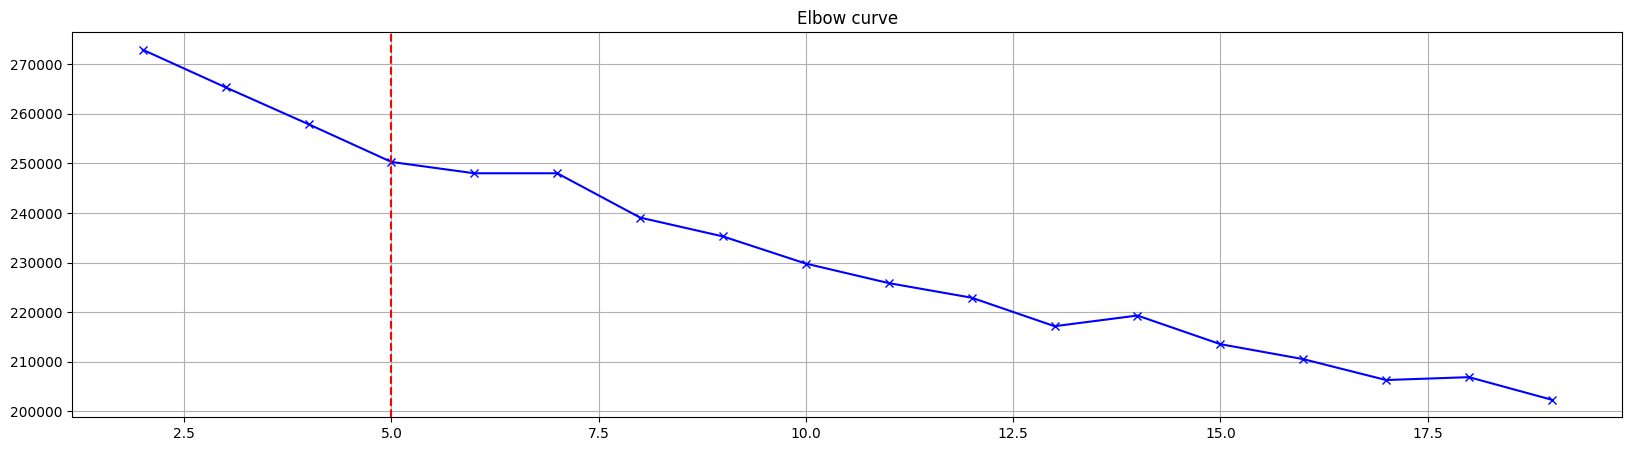

In [25]:
distorsions = []
score = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(mnist_df)
    distorsions.append(kmeans.inertia_)
    temp_score = silhouette_score(mnist_df,kmeans.fit_predict(mnist_df))
    score.append(temp_score)
    print('k',k,'sil',temp_score)

fig = plt.figure(figsize=(20, 5))
plt.plot(range(2, 20), distorsions,'bx-')
plt.grid(True)
plt.axvline(x=(score.index(sorted(score)[-2])+2), color='r', linestyle='--', label=f'Optimal k = {score.index(sorted(score)[-2])+2}')
plt.title('Elbow curve')

In [30]:
kmeans = KMeans(n_clusters=5,n_init='auto').fit(mnist_df)
print(kmeans.labels_)

[4 0 4 3 0 3 3 3 3 2 2 3 4 0 4 3 3 1 3 0 4 0 4 3 2 3 3 4 0 0 0 4 2 0 4 3 0
 0 0 0 3 3 0 0 4 0 0 3 3 4 1 4 4 2 4 3 0 3 0 3 4 3 0 3 0 0 3 4 2 3 2 4 0 0
 3 0 0 0 3 3 4 4 3 3 3 0 4 2 0 4 4 0 4 0 3 0 0 4 3 0 4 3 3 3 3 4 0 3 3 4 0
 0 3 0 0 3 3 3 3 4 0 3 4 3 3 2 3 3 4 4 4 4 3 4 0 4 0 2 3 0 3 3 0 3 0 3 4 4
 0 3 1 0 4 0 4 2 4 1 0 3 4 4 3 0 4 3 0 0 3 3 0 4 4 0 0 0 4 0 4 0 4 0 2 4 3
 4 4 2 0 0 0 4 3 4 0 0 4 3 4 4 2 0 0 0 0 3 4 4 3 3 0 3 0 3 4 4 0 0 4 3 4 2
 3 0 4 3 0 0 0 0 0 4 3 0 3 0 0 3 0 4 3 4 3 0 0 2 0 3 0 3 0 3 4 3 3 0 0 4 2
 4 0 3 0 3 0 4 0 4 2 1 4 0 3 3 3 0 3 4 0 4 3 0 0 3 1 4 1 0 4 3 4 3 0 4 3 2
 2 4 4 0 3 0 0 0 2 0 0 3 0 4 2 4 1 0 3 0 0 1 1 0 0 3 0 4 0 0 4 0 0 0 0 0 4
 4 0 3 3 1 4 0 0 0 4 4 0 4 4 0 3 0 4 2 2 0 0 4 0 3 3 1 4 3 0 3 4 0 1 4 4 3
 0 1 3 3 4 3 0 0 3 2 3 4 0 4 0 4 0 0 3 2 4 4 0 3 4 0 4 3 3 4 0 1 3 4 1 4 4
 4 0 3 0 4 3 3 3 0 3 4 0 0 4 3 0 2 3 0 0 3 3 0 3 3 3 3 0 0 1 3 4 2 4 4 0 4
 2 4 0 4 1 4 4 0 1 3 0 0 4 3 4 3 2 2 2 0 3 4 0 4 3 4 3 3 0 4 1 0 4 4 3 0 3
 3 0 3 4 3 3 3 0 2 4 4 1 

# 2 завдання

Візуалізація результату для 2d датасету:

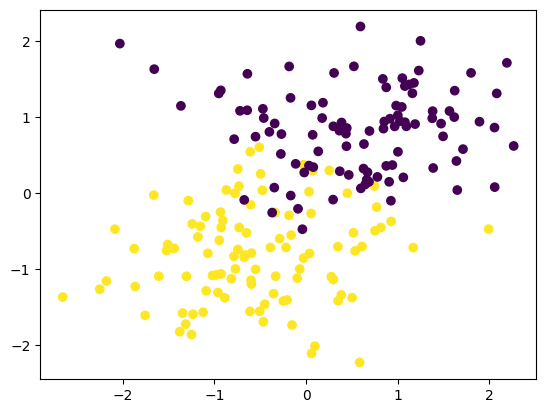

In [36]:
kmeans = KMeans(n_clusters=2,n_init='auto').fit(twodim_df)
plt.scatter(twodim_df[:,1], twodim_df[:,2],c=kmeans.predict(twodim_df))

Використовуємо алгоритм PCA для mnist:

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
mnist_df = pca.fit_transform(mnist_df)
mnist_df.shape

(499, 2)

Зробимо ще раз метод ліктя, на вже змінених за допомогою PCA даних:

k 2 sil 0.44046145438754136
k 3 sil 0.4340458339866515
k 4 sil 0.3963494473825244
k 5 sil 0.365767159535252
k 6 sil 0.37676160401027375
k 7 sil 0.36483132774789295
k 8 sil 0.3651479466754312
k 9 sil 0.38029961718172184
k 10 sil 0.3664479610420021
k 11 sil 0.3712595225827786
k 12 sil 0.3696293841688477
k 13 sil 0.38320151732736923
k 14 sil 0.3674561637474612
k 15 sil 0.37889579482785185
k 16 sil 0.3859431805373344
k 17 sil 0.36867520508613466
k 18 sil 0.3834876032261742
k 19 sil 0.3747478391935532


Text(0.5, 1.0, 'Elbow curve')

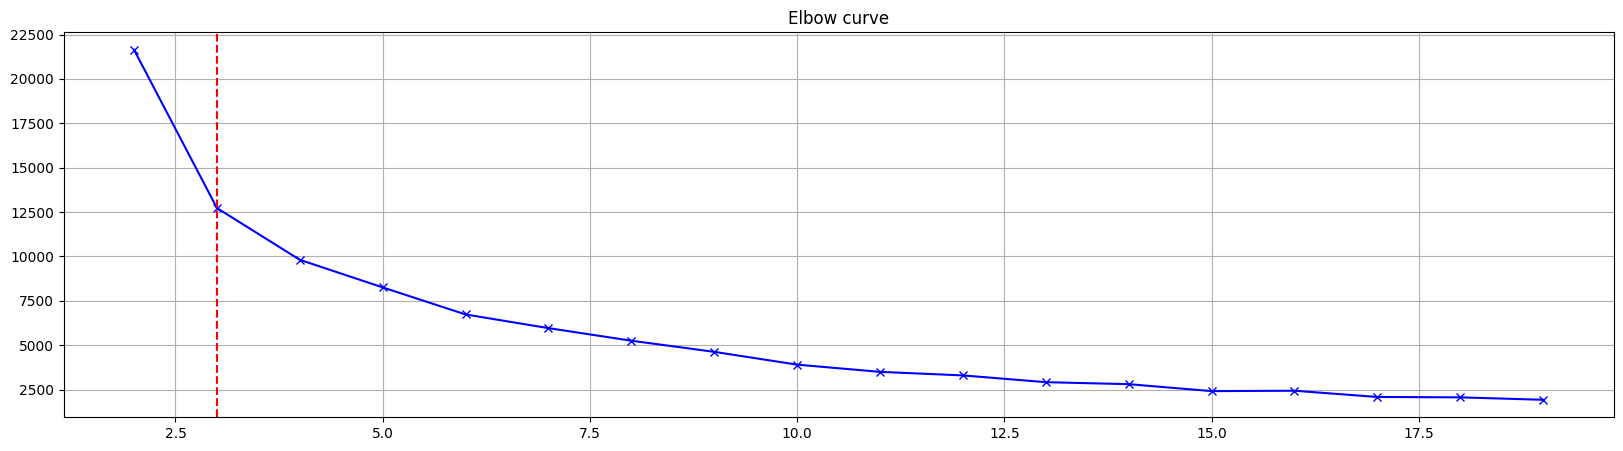

In [43]:
distorsions = []
score = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(mnist_df)
    distorsions.append(kmeans.inertia_)
    temp_score = silhouette_score(mnist_df,kmeans.fit_predict(mnist_df))
    score.append(temp_score)
    print('k',k,'sil',temp_score)

fig = plt.figure(figsize=(20, 5))
plt.plot(range(2, 20), distorsions,'bx-')
plt.grid(True)
plt.axvline(x=(score.index(sorted(score)[-2])+2), color='r', linestyle='--', label=f'Optimal k = {score.index(sorted(score)[-2])+2}')
plt.title('Elbow curve')

Візуалізуємо результат на 3 кластерах:

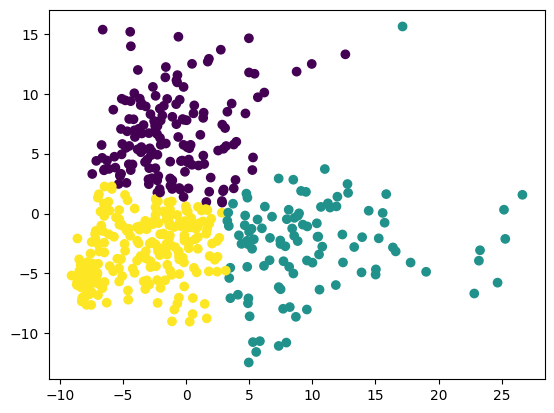

In [46]:
kmeans = KMeans(n_clusters=3,n_init='auto').fit(mnist_df)
plt.scatter(mnist_df[:,0], mnist_df[:,1],c=kmeans.predict(mnist_df))